# Exploratory Data Analysis (EDA): SETI Breakthrough Listen 

Based on the following notebook:

1. [Detecting Wow! Signal by Lakshya Malhotra](https://www.kaggle.com/lakshya91/detecting-wow-signal)


In [9]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [20]:
# functions 

def plot_data(ids:str, target:int)->None:
    ''' 
    Plots a sample array using its id and target (0 or 1)
    '''
    array = np.load(os.path.join(path, f'train/{ids[0]}/{ids}' + '.npy'))
    fig = plt.figure(figsize=(9, 8))
    for i in range(6):
        ax = fig.add_subplot(6, 1, i+1)
        ax.imshow(array[i].astype('float'), interpolation='nearest', aspect='auto')
        state = 'ON' if i%2 == 0 else 'OFF'
        if i == 0:
            ax.set_title(f'Id: {ids}, target: {target}, state: {state} target', size=16)
        else:
            ax.set_title(f'{state} target', size=16)
        plt.tight_layout()
        
def plot_multisamples(sample_list):
    '''
    Plots multiple samples from a list of sample arrays (sample_list). 
    '''
    for index in range( len(sample_list) ) :
        id, target = sample_list[index][0], sample_data[index][1]
        plot_data(id, target)
        

In [12]:
# read the training csv file
path = '../input/seti-breakthrough-listen/'
train_df = pd.read_csv(os.path.join(path, 'train_labels.csv'))
train_df.head()

,id,target
0,00034abb3629,0
1,0004300a0b9b,0
2,000453852fda,0
3,00047dfc96a9,0
4,0004be0baf70,0


In [14]:
# read the sample submission csv file
ssu_path = '../input/seti-breakthrough-listen/'
ssu_df = pd.read_csv(os.path.join(ssu_path, 'sample_submission.csv'))
ssu_df.head()

,id,target
0,00034db451c4,0.5
1,0006316b5ca0,0.5
2,0006a953d21b,0.5
3,0008a33d6695,0.5
4,00095b5119fc,0.5


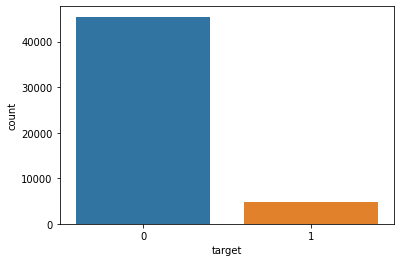


 percentage of target values:


0    90.642879
1     9.357121
Name: target, dtype: float64

In [15]:
# distribution of the target values
sns.countplot(x=train_df['target'])
plt.show()
print('\n', 'percentage of target values:')
train_df['target'].value_counts(normalize=True)*100

In [17]:
# get the file ids for both the classes
## subset dataframe by target values [0,1]
class_1 = train_df[train_df['target'] == 1][:2]
class_0 = train_df[train_df['target'] == 0][:2]
## transform to list of tuples: (id, target_value)
class_1 = list(zip(class_1.id, class_1.target))
class_0 = list(zip(class_0.id, class_0.target))
## sample list (four samples as tuples)
sample_data = [*class_1, *class_0]
sample_data

[('001c619bdf53', 1),
 ('0030dc7cf6e0', 1),
 ('00034abb3629', 0),
 ('0004300a0b9b', 0)]

In [18]:
# shape of samples
id = sample_data[0][0]
array = np.load(os.path.join(path, f'train/{id[0]}/{id}' + '.npy'))
array.shape

(6, 273, 256)

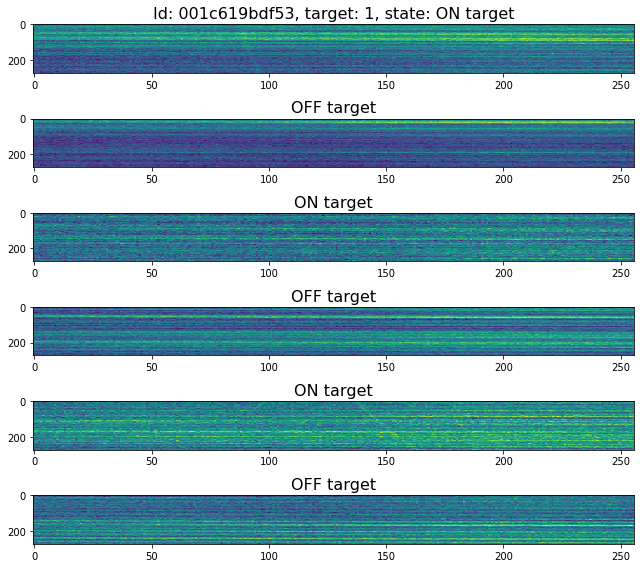

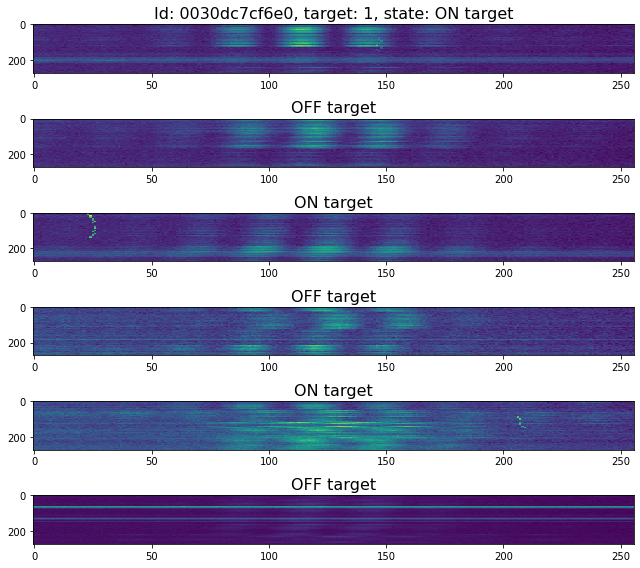

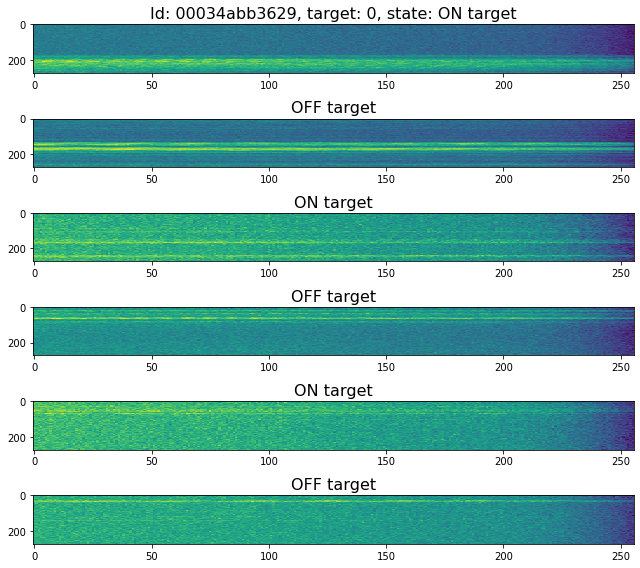

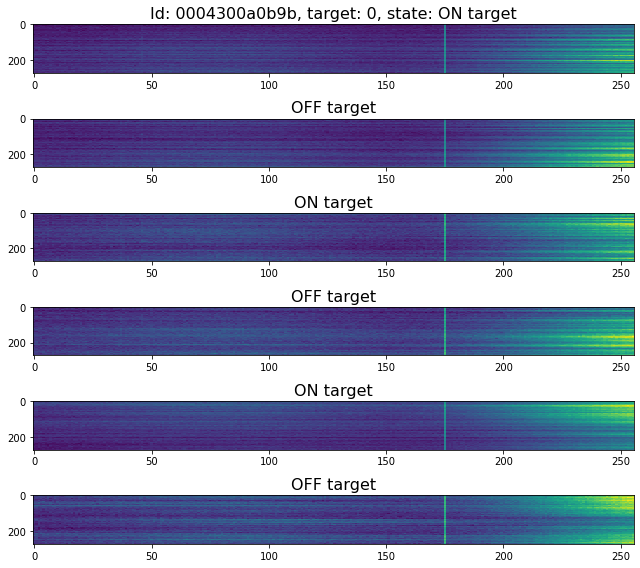

In [21]:
# plot the samples in sample_data
plot_multisamples(sample_list=sample_data)